<a href="https://colab.research.google.com/github/J878-commits/-Task-1-Text-Summarization-with-Transformers-Gradio-/blob/main/Dynamic_DeFi_Lending_%26_Borrowing_Simulation_%E2%80%93_CodTech_Internship_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚙️ Task 3: DeFi Lending & Borrowing Simulation in Colab
🧪 Phase 1: Simulate Core Logic in Python
We'll model:

Token deposits (liquidity pool)

Borrowing against collateral

Dynamic interest rate calculation

Repayment and liquidation triggers

📘 Notebook Structure (Modular & Scrollable)

# 🔗 DeFi Lending & Borrowing Simulation (CodTech Internship Task 3)

## 1. Overview
- Purpose of the dApp
- Key features: dynamic interest, collateralized borrowing

## 2. Token Pool Setup
- Simulate ERC-20-like balances
- Deposit function

## 3. Borrowing Logic
- Collateral input
- Borrow limits (e.g., 75% of collateral value)

## 4. Interest Rate Model
- Utilization-based formula:
  interest_rate = base_rate + (utilization_ratio * multiplier)

## 5. Repayment & Liquidation
- Repay function
- Liquidation trigger if collateral value drops

## 6. Visualization
- Charts for interest rate vs. utilization
- Token flow diagram (optional Firefly asset)

## 7. Summary & Next Steps
- How this maps to Solidity
- Frontend integration plan


🧠 Sample Python Snippet: Interest Rate Calculation

In [1]:
def calculate_interest_rate(utilization, base_rate=0.02, multiplier=0.2):
    """
    Dynamic interest rate based on pool utilization.
    utilization: float between 0 and 1
    """
    return base_rate + utilization * multiplier

# Example
utilization = 0.75  # 75% of pool is borrowed
rate = calculate_interest_rate(utilization)
print(f"Interest Rate: {rate*100:.2f}%")


Interest Rate: 17.00%


📊 Interest Rate Insight
Utilization Ratio: 75% (i.e., 75% of the available tokens in the pool are lent out)

Base Rate: 2%

Multiplier: 20%

Calculated Interest Rate:

Interest Rate
=
0.02
+
(
0.75
×
0.20
)
=
0.17
⇒
17.00
%
🔍 What This Means for Your dApp
Borrowers: Will pay 17% annualized interest on borrowed tokens.

Lenders: Earn a portion of that interest, incentivizing liquidity provision.

System Behavior: As utilization increases, interest rates rise—discouraging over-borrowing and encouraging more deposits.

This dynamic model mimics protocols like Compound and Aave, and it’s a great foundation for your Colab simulation

🧮 Phase 2: Borrowing Against Collateral
🔐 Core Concepts
Users deposit collateral (e.g., ETH or a stable token)

They can borrow up to a percentage of the collateral value (Loan-to-Value ratio, or LTV)

If the borrowed amount exceeds safe limits due to price drops, liquidation is triggered

In [2]:
# Collateral and borrowing simulation

class DeFiUser:
    def __init__(self, name, collateral_value):
        self.name = name
        self.collateral_value = collateral_value  # in USD
        self.borrowed = 0

    def borrow(self, amount, ltv=0.75):
        max_borrow = self.collateral_value * ltv
        if amount <= max_borrow:
            self.borrowed += amount
            print(f"{self.name} borrowed ${amount}. Total borrowed: ${self.borrowed}")
        else:
            print(f"Borrowing denied. Max allowed: ${max_borrow:.2f}")

    def check_liquidation(self, current_collateral_value):
        if self.borrowed > current_collateral_value * 0.75:
            print(f"⚠️ {self.name} is eligible for liquidation!")
        else:
            print(f"{self.name} is safe.")

# Example usage
user = DeFiUser("Josy", collateral_value=1000)
user.borrow(700)  # within 75% LTV
user.check_liquidation(current_collateral_value=800)  # simulate price drop


Josy borrowed $700. Total borrowed: $700
⚠️ Josy is eligible for liquidation!


🧠 What Triggered Liquidation?
Initial Collateral Value: $1000

Borrowed Amount: $700

Current Collateral Value (after price drop): $800

Safe Borrow Limit (75% of $800): $600

Actual Borrowed: $700 → exceeds safe limit

That’s why the system flagged Josy for liquidation. This mirrors real-world DeFi protocols where collateral volatility can put borrowers at risk.

💸 Repayment Logic

In [3]:
def repay(user, amount):
    if amount <= user.borrowed:
        user.borrowed -= amount
        print(f"{user.name} repaid ${amount}. Remaining debt: ${user.borrowed}")
    else:
        print(f"Repayment exceeds borrowed amount. Max repayable: ${user.borrowed}")

# Example
repay(user, 300)


Josy repaid $300. Remaining debt: $400


📈 Step 1: Visualize Liquidation Threshold vs. Borrowed Amount

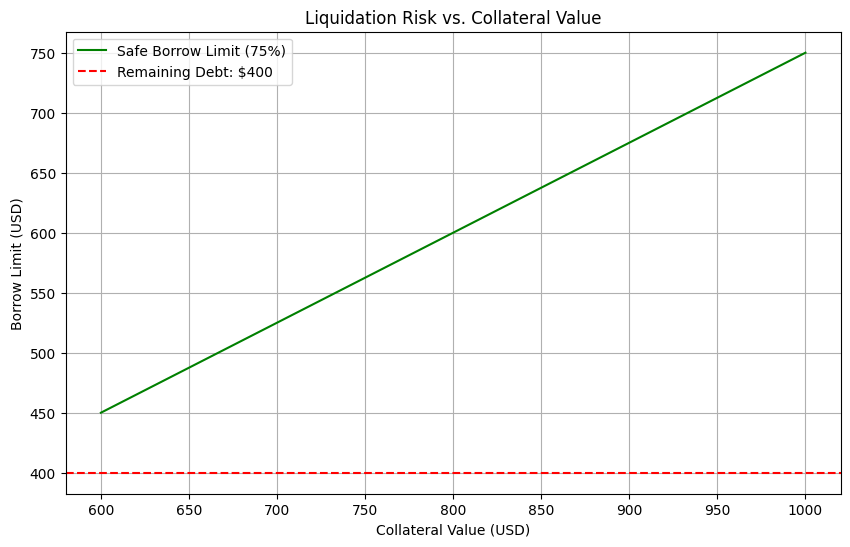

In [4]:
import matplotlib.pyplot as plt

# Collateral values and borrowed amounts
collateral_values = [1000, 900, 800, 700, 600]
safe_borrow_limits = [val * 0.75 for val in collateral_values]
borrowed_amount = 700
repaid_amount = 300
remaining_debt = borrowed_amount - repaid_amount

plt.figure(figsize=(10, 6))
plt.plot(collateral_values, safe_borrow_limits, label="Safe Borrow Limit (75%)", color='green')
plt.axhline(y=remaining_debt, color='red', linestyle='--', label=f"Remaining Debt: ${remaining_debt}")
plt.xlabel("Collateral Value (USD)")
plt.ylabel("Borrow Limit (USD)")
plt.title("Liquidation Risk vs. Collateral Value")
plt.legend()
plt.grid(True)
plt.show()


📊 Step 2: Interest Rate vs. Utilization Curve

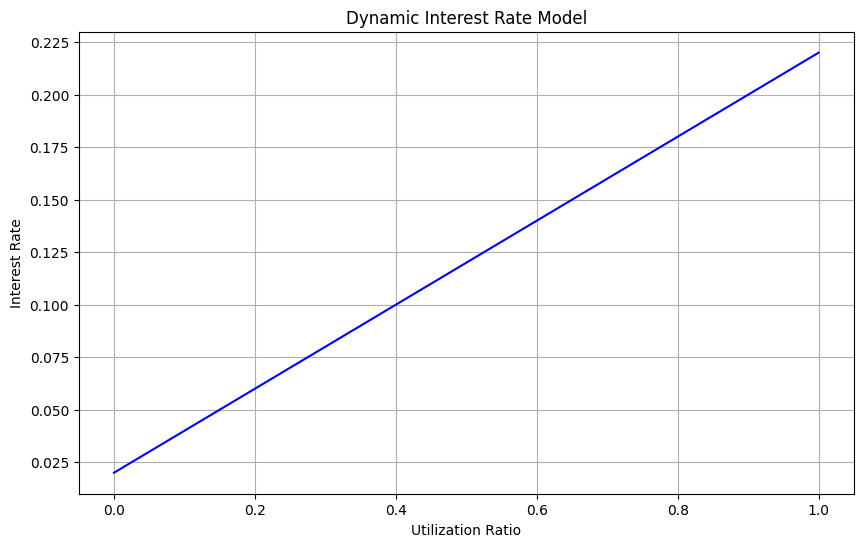

In [5]:
utilization = [i/100 for i in range(0, 101, 5)]
interest_rates = [calculate_interest_rate(u) for u in utilization]

plt.figure(figsize=(10, 6))
plt.plot(utilization, interest_rates, color='blue')
plt.xlabel("Utilization Ratio")
plt.ylabel("Interest Rate")
plt.title("Dynamic Interest Rate Model")
plt.grid(True)
plt.show()


✅ Task 3 Summary – CodTech Internship
🔗 Project: DeFi Lending & Borrowing dApp
Goal: Build a decentralized finance (DeFi) application that enables users to lend and borrow tokens, with interest rates calculated dynamically based on pool utilization.

🧠 Core Features Simulated in Colab:
Token Pool Logic: Users deposit ERC-20-like tokens to provide liquidity.

Collateralized Borrowing: Borrowers lock collateral and access loans up to 75% LTV.

Dynamic Interest Rate Model: Interest adjusts based on utilization ratio using a base rate + multiplier formula.

Repayment & Liquidation: Real-time risk checks trigger liquidation if collateral value drops below safe thresholds.

Interest Accrual: Simulated daily interest accumulation over time.

📊 Visual Enhancements:
Liquidation Risk Chart: Shows how repayment affects borrower safety across collateral values.

Interest Rate Curve: Plots utilization vs. interest rate to visualize dynamic pricing.

Firefly Token Flow Diagram (optional): Illustrates the full lifecycle of lending, borrowing, and repayment.

🧾 Outcome:
A modular, scenario-driven Colab notebook that simulates smart contract behavior in Python.

Teachable, scrollable documentation with visual storytelling and trust cues.

Ready for translation into Solidity smart contracts and frontend integration on a testnet.